In [2]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
from matplotlib import pyplot as plt

## Make a request using the requests library
request.get() uses http GET to get a webpage
request.post() uses http POST when the webpage is submitting a form
checking the status_code on the result let's you know your request was successful

In [3]:
website_url= 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [4]:
website_url2='https://countrymusichalloffame.org/hall-of-fame/members/page/2'
response2 = requests.get(website_url2)
response2.status_code

200

## Next look at the content of the result
it is a Response datatype
but it looks like an html document

In [5]:
#print(type(response))
#response.content

In [6]:
#print(type(response2))
#response2.content

In [7]:
names = BeautifulSoup(response.content, 'lxml')
print(names.title.text)

Hall of Fame Members | Country Music Hall of Fame


In [8]:
names2 = BeautifulSoup(response2.content, 'lxml')
print(names2.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [9]:
#print(names)

In [10]:
#print(names2)

## You can get the table that contains the data from the page using beautiful soup


It is a good idea to check to see how many tables you scraped
then use pd.read_html() get a list dataframes extracted from the soup tables
you'll need to convert the tables (still a response object) to a string before pandas can read it
to load the table you want to a dataframe, grab it from the list of dataframes

In [11]:
## from Teng
result_list=[]
for artist in names.find_all('h3'):
    print(artist.text)
    result_list.append(artist.text)

Roy Acuff
Alabama
Bill Anderson
Eddy Arnold
Chet Atkins
Gene Autry
DeFord Bailey
Bobby Bare
Johnny Bond


In [12]:
#result_listA = names.find_all('h3') 
#result_listA


In [13]:
result_list2=[]
for artist in names2.find_all('h3'):
    print(artist.text)
    result_list2.append(artist.text)

Bobby Braddock
Harold Bradley
Jerry Bradley
Owen Bradley
Rod Brasfield
Garth Brooks
Brooks & Dunn
Jim Ed Brown
Jim Ed Brown and the Browns


## Adding year inducted

In [14]:
###Joshuas 
#artists = []
#for i in range(len(vcards_t)):
#    name = vcards_t[i].get_text().replace("\n", "")
#    artists.append(name)
#print(artists)


In [15]:
#Teng
x = [element.text for element in names.find_all("div", "vertical-card_content--copy")]


In [16]:
x2 = [element.text for element in names2.find_all("div", "vertical-card_content--copy")]

In [17]:
year = []
for element in x:
    year.append(element.strip())

print(year)


['Inducted 1962', 'Inducted 2005', 'Inducted 2001', 'Inducted 1966', 'Inducted 1973', 'Inducted 1969', 'Inducted 2005', 'Inducted 2013', 'Inducted 1999']


In [18]:
year2 = []
for element in x2:
    year2.append(element.strip())

In [19]:
print(year2)

['Inducted 2011', 'Inducted 2006', 'Inducted 2019', 'Inducted 1974', 'Inducted 1987', 'Inducted 2012', 'Inducted 2019', 'Inducted 2015', 'Inducted 2015']


In [20]:

b=[]
for i in year:
 b+=i.split(" ")
print(b)

['Inducted', '1962', 'Inducted', '2005', 'Inducted', '2001', 'Inducted', '1966', 'Inducted', '1973', 'Inducted', '1969', 'Inducted', '2005', 'Inducted', '2013', 'Inducted', '1999']


In [21]:
c=[]
for i in year2:
 c+=i.split(" ")
print(c)

['Inducted', '2011', 'Inducted', '2006', 'Inducted', '2019', 'Inducted', '1974', 'Inducted', '1987', 'Inducted', '2012', 'Inducted', '2019', 'Inducted', '2015', 'Inducted', '2015']


In [22]:

b=b[1::2]
print(b)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [23]:
c=c[1::2]
print(c)

['2011', '2006', '2019', '1974', '1987', '2012', '2019', '2015', '2015']


## Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame.

In [24]:
df={'Name':result_list,'Year':b}
df

{'Name': ['Roy Acuff',
  'Alabama',
  'Bill Anderson',
  'Eddy Arnold',
  'Chet Atkins',
  'Gene Autry',
  'DeFord Bailey',
  'Bobby Bare',
  'Johnny Bond'],
 'Year': ['1962',
  '2005',
  '2001',
  '1966',
  '1973',
  '1969',
  '2005',
  '2013',
  '1999']}

In [25]:
df2={'Name':result_list2,'Year':c}
df2

{'Name': ['Bobby Braddock',
  'Harold Bradley',
  'Jerry Bradley',
  'Owen Bradley',
  'Rod Brasfield',
  'Garth Brooks',
  'Brooks & Dunn',
  'Jim Ed Brown',
  'Jim Ed Brown and the Browns'],
 'Year': ['2011',
  '2006',
  '2019',
  '1974',
  '1987',
  '2012',
  '2019',
  '2015',
  '2015']}

In [26]:
df=pd.DataFrame(df)
df

,Name,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [27]:
df2=pd.DataFrame(df2)
df2

,Name,Year
0,Bobby Braddock,2011
1,Harold Bradley,2006
2,Jerry Bradley,2019
3,Owen Bradley,1974
4,Rod Brasfield,1987
5,Garth Brooks,2012
6,Brooks & Dunn,2019
7,Jim Ed Brown,2015
8,Jim Ed Brown and the Browns,2015


## write a for loop that will cycle through all 16 pages and build a DataFrame containing all inductees and the year of their induction.

In [29]:
url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
final_df = pd.DataFrame()

for page in range(1,17):
    r = requests.get(url + str(page))
    soup = BeautifulSoup(r.content, "lxml")

    result_list=[]
    for artist in soup.find_all("h3"):
        #print(link.text)
        result_list.append(artist.text)
        
    x = [element.text for element in soup.find_all("div", "vertical-card_content--copy")]
    year = []
    for element in x:
        year.append(element.strip())
        
    b=[]
    for i in year:
        b+=i.split(" ")
       
    b=b[1::2]

    dict={'Name':result_list,'Year':b}
    df= pd.DataFrame(dict)
    final_df = final_df.append(df)

In [30]:
## Joshuas

#Import re
#website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/{}'
#artists = []
#inducted = []
#for page in range(1,17):
#    url = website_url.format(page)
#    response = requests.get(url)
#    soup = BeautifulSoup(response.content, 'lxml')
#    names = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
#    dates = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
#    for i in range(len(names)):
#        name = names[i].get_text().replace("\n", "").strip()
#        artists.append(name)
#    for i in range(len(dates)):
#        date = dates[i].get_text().replace("\n", "").strip()
#        year = re.sub("[^0-9]", "", date)
#        inducted.append(year)
#print(artists)
#print(inducted)

In [38]:
final_df
#len(final_df.index)

,Name,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [32]:
final_df.reset_index(drop=True, inplace=True)

### Create a visual using the data that you scraped. Prepare a short (<5 minute) presentation.

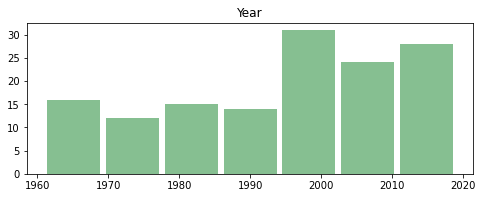

In [34]:
final_df['Year'] = final_df['Year'].astype('int')
ax = final_df.hist(column='Year', bins=7, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

### Bonus Question: If you navigate to Roy Acuff's page, you will see that his date of birth and date of death are listed towards the top of the page, along with his birthplace. Write some code that will extract these three values. Once you get it working for Roy Acuff, figure out how you can automatically extract these values across the whole dataset of artists. In doing this, you'll need to figure out a way to automatically determine the correct urls for each artist. Note also that not every artist will have these three values, so write your code in a way that it can handle cases where these values are missing. Alabama is one such example.

In [ ]:
url = 'https://countrymusichalloffame.org/artist/'
final_df = pd.DataFrame()

for name in final_df[::]:
    r = requests.get(url + final_df[0])
    soup = BeautifulSoup(r.content, "lxml")

    result_list=[]
    for artist in soup.find_all("p"):
        #print(link.text)
        result_list.append(artist.text)
        
    x = [element.text for element in soup.find_all("div", "vertical-card_content--copy")]
    year = []
    for element in x:
        year.append(element.strip())
        
    b=[]
    for i in year:
        b+=i.split(" ")
       
    b=b[1::2]

    dict={'Name':result_list,'Year':b}
    df= pd.DataFrame(dict)
    final_df = final_df.append(df)